In [1]:
#Simple Linear Regression Assignment
#1) Delivery_time -> Predict delivery time using sorting time
#Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# reading a csv file using pandas library
dataset=pd.read_csv("C:\\Users\\DELL\\Downloads\\delivery_time.csv")
dataset
dataset.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [2]:
dataset=dataset.rename(columns={'Delivery Time': 'DeliveryTime','Sorting Time': 'SortingTime' })

In [3]:
dataset.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


{'whiskers': [<matplotlib.lines.Line2D at 0x2307f5aad90>,
 'caps': [<matplotlib.lines.Line2D at 0x2307f5d5f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2307f5bd390>],
 'medians': [<matplotlib.lines.Line2D at 0x2307f5f53d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2307f5f5d50>],
 'means': []}

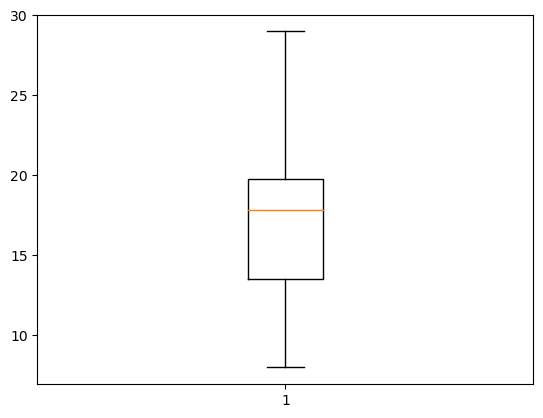

In [4]:
plt.boxplot(dataset["DeliveryTime"])

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

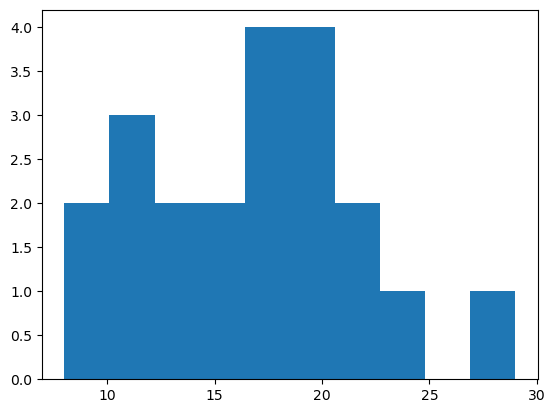

In [5]:
plt.hist(dataset["DeliveryTime"])

{'whiskers': [<matplotlib.lines.Line2D at 0x230010fd750>,
 'caps': [<matplotlib.lines.Line2D at 0x2307f5e6ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230010fcb50>],
 'medians': [<matplotlib.lines.Line2D at 0x23001108510>],
 'fliers': [<matplotlib.lines.Line2D at 0x23001108e90>],
 'means': []}

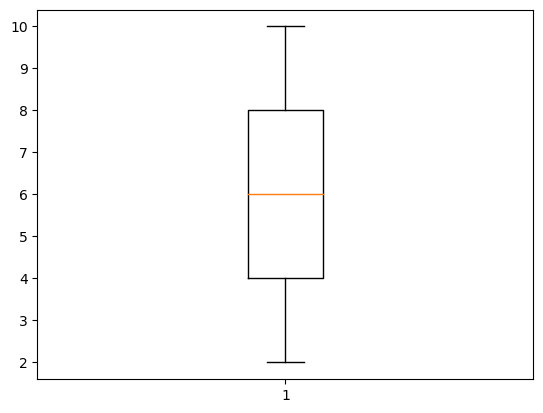

In [6]:
plt.boxplot(dataset["SortingTime"])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

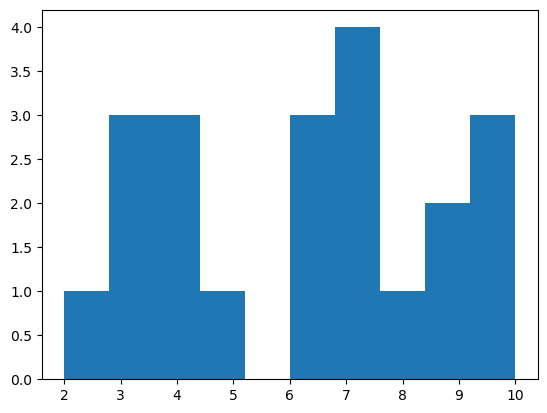

In [7]:
plt.hist(dataset["SortingTime"])

Text(0, 0.5, 'SortingTime')

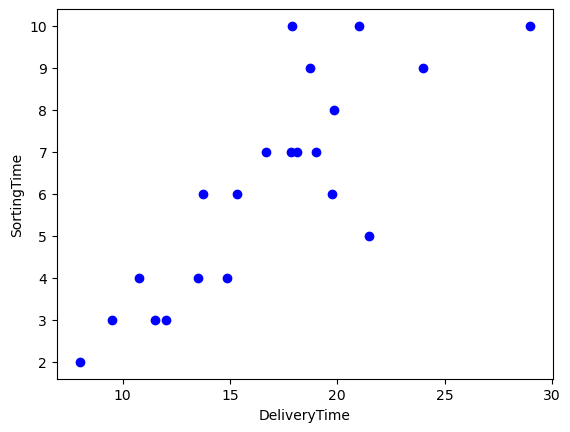

In [8]:
plt.plot(dataset["DeliveryTime"],dataset["SortingTime"],"bo")
plt.xlabel("DeliveryTime")
plt.ylabel("SortingTime")

In [9]:
dataset.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [10]:
corr=dataset["SortingTime"].corr(dataset["DeliveryTime"])
corr

0.8259972607955325

In [11]:
x=dataset["DeliveryTime"]
y=dataset["SortingTime"]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [13]:
x_train[:5]

2     19.75
5     15.35
0     21.00
9     18.75
15    14.88
Name: DeliveryTime, dtype: float64

In [14]:
x_test[:5]

20    21.50
11    10.75
16    13.75
14    12.03
17    18.11
Name: DeliveryTime, dtype: float64

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15,)
(15,)
(6,)
(6,)


In [16]:
import numpy as np
x_train=x_train[:,np.newaxis]
x_test=x_test[:,np.newaxis]

C:\Users\DELL\AppData\Local\Temp\ipykernel_3352\1543249601.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train=x_train[:,np.newaxis]
C:\Users\DELL\AppData\Local\Temp\ipykernel_3352\1543249601.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test=x_test[:,np.newaxis]


In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15, 1)
(15,)
(6, 1)
(6,)


In [18]:
x_train[:3]

array([[19.75],
       [15.35],
       [21.  ]])

In [23]:
x_test[:3]

array([[21.5 ],
       [10.75],
       [13.75]])

In [19]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [24]:
x_test[:3]

array([[21.5 ],
       [10.75],
       [13.75]])

In [25]:
lm.fit(x_train,y_train)

LinearRegression()

In [26]:
print(lm.intercept_)
print(lm.coef_)

-1.223023102109627
[0.43835459]


In [29]:
y_pred=lm.predict(x_test)
y_pred

array([8.2016006 , 3.48928875, 4.80435252, 4.05038262, 6.71557854,
       6.62352407])

In [30]:
y_pred[:5]

array([8.2016006 , 3.48928875, 4.80435252, 4.05038262, 6.71557854])

In [31]:
y_test[:5]

20    5
11    4
16    6
14    3
17    7
Name: SortingTime, dtype: int64

In [33]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

4.087572365008316

In [34]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)
r2_score

0.20458051275513867

Text(0, 0.5, 'predicted y')

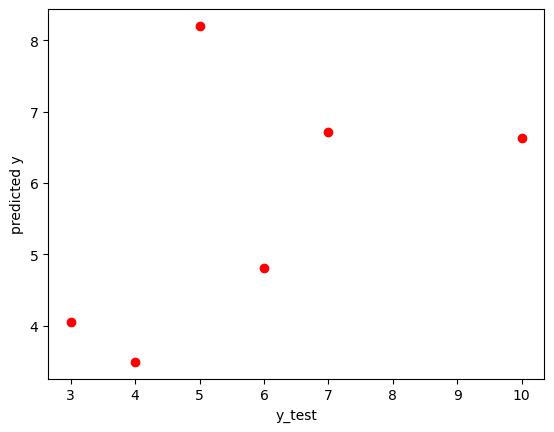

In [36]:
plt.scatter(y_test,y_pred,color=["red"])
plt.xlabel("y_test")
plt.ylabel("predicted y")

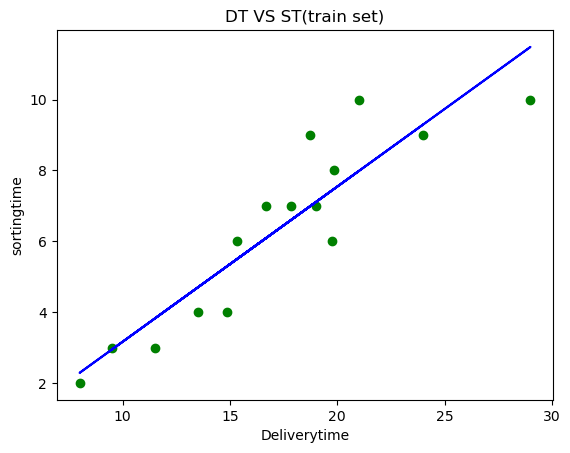

In [37]:
plt.scatter(x_train,y_train,color="green")
plt.plot(x_train,lm.predict(x_train),color="blue")
plt.title("DT VS ST(train set)")
plt.xlabel("Deliverytime")
plt.ylabel("sortingtime")
plt.show()

In [50]:
model=smf.ols("DeliveryTime~SortingTime",data=dataset).fit()

In [51]:
# Finding Coefficient parameters
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [52]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept      3.823349
 SortingTime    6.387447
 dtype: float64,
 Intercept      0.001147
 SortingTime    0.000004
 dtype: float64)

In [53]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        15:58:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MODEL PREDICTION

In [54]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [55]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [58]:
data_pred=pd.DataFrame(new_data,columns=['SortingTime'])
data_pred

,SortingTime
0,5
1,8


In [59]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Q2) Salary_hike -> Build a prediction model for Salary_hike
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [61]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [62]:
dataset=pd.read_csv("C:\\Users\\DELL\\Downloads\\Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [63]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [66]:
dataset.shape

(30, 2)

In [67]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [68]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


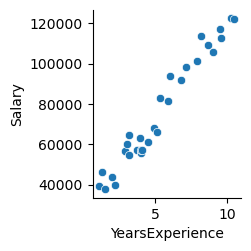

In [70]:
#visualisation
import seaborn as sns
%matplotlib inline
sns.pairplot(dataset,x_vars=["YearsExperience"],y_vars=["Salary"],kind="scatter")

linear regression

In [71]:
x=dataset["YearsExperience"]
x.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [72]:
y=dataset["Salary"]
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

splitting data 

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [74]:
x_train[:5]

25     9.0
2      1.5
29    10.5
15     4.9
17     5.3
Name: YearsExperience, dtype: float64

In [75]:
x_test[:5]

27    9.6
13    4.1
0     1.1
6     3.0
10    3.9
Name: YearsExperience, dtype: float64

In [76]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(21,)
(9,)
(21,)
(9,)


In [77]:
x_train=x_train[:,np.newaxis]
x_test=x_test[:,np.newaxis]

C:\Users\DELL\AppData\Local\Temp\ipykernel_3352\3168945171.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train=x_train[:,np.newaxis]
C:\Users\DELL\AppData\Local\Temp\ipykernel_3352\3168945171.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test=x_test[:,np.newaxis]


In [78]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(21, 1)
(9, 1)
(21,)
(9,)


In [79]:
x_train[:5]

array([[ 9. ],
       [ 1.5],
       [10.5],
       [ 4.9],
       [ 5.3]])

In [80]:
x_test[:5]

array([[9.6],
       [4.1],
       [1.1],
       [3. ],
       [3.9]])

performing linear regressiiobn

In [81]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [82]:
lm.fit(x_train,y_train)

LinearRegression()

In [83]:
print(lm.intercept_)
print(lm.coef_)

25392.717410547113
[9578.69310251]


PREDICTION

In [84]:
y_pred=lm.predict(x_test)
y_pred

array([117348.17119463,  64665.35913083,  35929.27982331,  54128.79671807,
        62749.62051033,  68496.83637184,  90527.83050761,  81907.00671535,
       116390.30188438])

In [85]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

20501129.31289129

In [86]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)
r2_score

0.9672561719711872

Text(0, 0.5, 'predicted y')

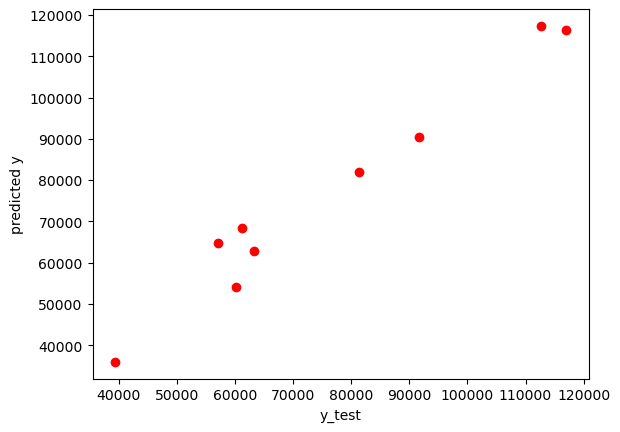

In [87]:
plt.scatter(y_test,y_pred,color=["red"])
plt.xlabel("y_test")
plt.ylabel("predicted y")

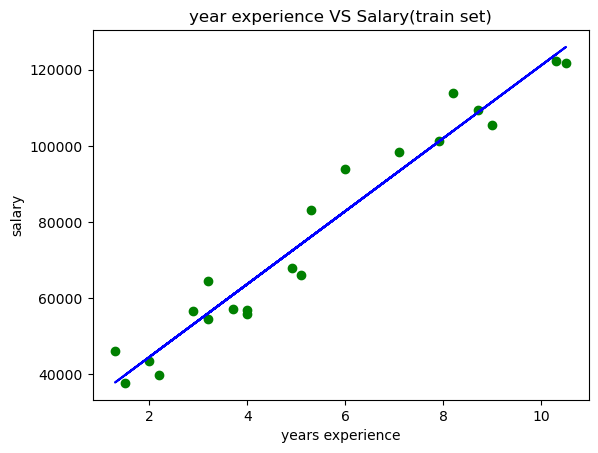

In [88]:
plt.scatter(x_train,y_train,color="green")
plt.plot(x_train,lm.predict(x_train),color="blue")
plt.title("year experience VS Salary(train set)")
plt.xlabel("years experience")
plt.ylabel("salary")
plt.show()

In [137]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [138]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [139]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        16:44:02   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
from scipy.stats import skew
skew(dataset.YearsExperience)

0.3603123252525561

In [141]:
skew(dataset.Salary)

0.3361618825592921

<Axes: >

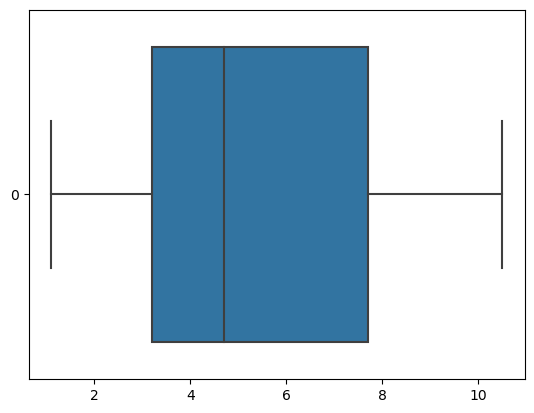

In [142]:
sns.boxplot(dataset['YearsExperience'], orient = 'h')

<Axes: >

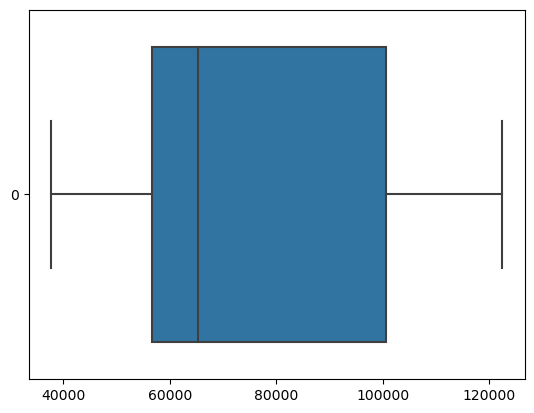

In [143]:
sns.boxplot(dataset['Salary'], orient='h')

In [144]:
#finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [145]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [146]:
#model prediction
# Manual prediction for say 2 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [147]:
# Automatic Prediction for say 2 & 6Years Experience
new_data=pd.Series([2,6])
new_data

0    2
1    6
dtype: int64

In [148]:
data_pred=pd.DataFrame(new_data,columns=["YearsExperience"])
data_pred

,YearsExperience
0,2
1,6


In [149]:
model.predict(data_pred)

0    44692.124842
1    82491.974127
dtype: float64

From above we can say that this is the best model.
 